In [12]:
#Usual imports to create dataframe, plots and to manipulate arrays
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#load the data from the file EgoAlterProfiles.txt (decompressed locally), each column is separated by a tab
data = pd.read_csv('Reddit_Conv_french.csv')
data.head()

,Unnamed: 0,link_id,subreddit_id,uid,comment_id,score,parent_id,create_utc,text
0,0,8r1kz,2qhjz,1688932,c0a62uj,3,8r1kz,1244576002,Ironie : l'article disant qu'on est plus capab...
1,1,8r1kz,2qhjz,786883,c0a6lmb,1,c0a62uj,1244621120,"Moi-même, j'ai dû me forcer pour arriver jusqu..."
2,2,8sncs,2qhjz,390497,c0aawpk,1,8sncs,1245076061,Service qui sera rendu au contribuable pour la...
3,3,8sncs,2qhjz,32884,c0aaxba,3,c0aawpk,1245077396,Eeeeh oui ! 70 millions pour une loi qui aura ...
4,4,8v13c,2qhjz,796919,c0aj3ov,2,8v13c,1245830384,Est-ce qu'elle a vraiment commis des crimes qu...


In [14]:
#only keep comments from the /r/france subreddit. we can make the assumption that the users that comment in this subreddit are french and thus located in France.
#https://www.reddit.com/r/france/about.json gives us this id
france_posts = data[data.subreddit_id == '2qhjz']
france_posts.head()

,Unnamed: 0,link_id,subreddit_id,uid,comment_id,score,parent_id,create_utc,text
0,0,8r1kz,2qhjz,1688932,c0a62uj,3,8r1kz,1244576002,Ironie : l'article disant qu'on est plus capab...
1,1,8r1kz,2qhjz,786883,c0a6lmb,1,c0a62uj,1244621120,"Moi-même, j'ai dû me forcer pour arriver jusqu..."
2,2,8sncs,2qhjz,390497,c0aawpk,1,8sncs,1245076061,Service qui sera rendu au contribuable pour la...
3,3,8sncs,2qhjz,32884,c0aaxba,3,c0aawpk,1245077396,Eeeeh oui ! 70 millions pour une loi qui aura ...
4,4,8v13c,2qhjz,796919,c0aj3ov,2,8v13c,1245830384,Est-ce qu'elle a vraiment commis des crimes qu...


In [15]:
print(len(france_posts.uid.unique()))
print(len(france_posts.comment_id.unique()))

267840
267840


In [16]:
france_posts=france_posts[['uid', 'create_utc', 'comment_id']].copy()
france_posts['local_datetime'] = pd.to_datetime(france_posts['create_utc'] , unit='s')
france_posts['weekday'] = pd.DatetimeIndex(france_posts['local_datetime']).strftime("%A")
france_posts['time_hour'] = pd.DatetimeIndex(france_posts['local_datetime']).hour
france_posts.head()

,uid,create_utc,comment_id,local_datetime,weekday,time_hour
0,1688932,1244576002,c0a62uj,2009-06-09 19:33:22,Tuesday,19
1,786883,1244621120,c0a6lmb,2009-06-10 08:05:20,Wednesday,8
2,390497,1245076061,c0aawpk,2009-06-15 14:27:41,Monday,14
3,32884,1245077396,c0aaxba,2009-06-15 14:49:56,Monday,14
4,796919,1245830384,c0aj3ov,2009-06-24 07:59:44,Wednesday,7


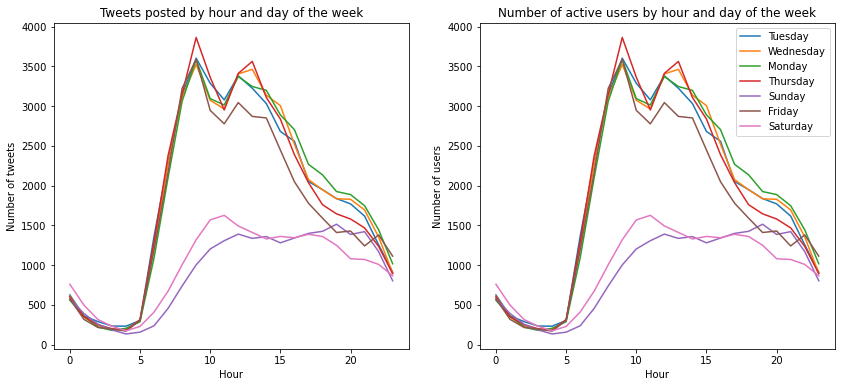

In [17]:
import numpy as np
import matplotlib.pyplot as plt

daily_activity = france_posts.groupby(['weekday','time_hour'],as_index=False)
tweets_stats=daily_activity.size()
days=france_posts.weekday.unique()
users_stats=daily_activity.nunique()

fig, axs = plt.subplots(1, 2, figsize=(14,6), sharex = True)
for day in days:
    daily_tweets=users_stats[users_stats.weekday==str(day)]
    axs[0].plot(daily_tweets.time_hour,daily_tweets.comment_id,label=str(day))
    axs[1].plot(daily_tweets.time_hour,daily_tweets.uid,label=str(day))
    
    
axs[0].set_title('Tweets posted by hour and day of the week')
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('Number of tweets')
axs[1].set_title('Number of active users by hour and day of the week')
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('Number of users')
axs[1].legend()